# Importações

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Pré-processamento

In [2]:
dadosMedicos = pd.read_csv(rf'..\2015.csv', sep=';')
dadosMedicos

C:\Users\isabe\AppData\Local\Temp\ipykernel_2400\219197495.py:1: DtypeWarning: Columns (96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  dadosMedicos = pd.read_csv(rf'..\2015.csv', sep=';')


,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,120000,2015,1,1,6.360294e+13,1215100018110,1,69900970,120040,19691208,...,NaN,1,0,0,0,0,0,0,0,0
1,120000,2015,1,1,6.360294e+13,1215100018198,1,69900970,120040,19730513,...,NaN,1,0,0,0,0,0,0,0,0
2,120000,2015,1,1,6.360294e+13,1215100018341,1,69921000,120080,19530312,...,NaN,1,0,0,0,0,0,0,0,0
3,120000,2015,1,1,6.360294e+13,1215100018363,1,69900970,120040,19910618,...,NaN,1,0,0,0,0,0,0,0,0
4,120000,2015,1,1,6.360294e+13,1215100018385,1,69960000,120030,19950619,...,NaN,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,110000,2015,2,1,6.074262e+13,1115500004542,1,76900100,110012,19460501,...,NaN,0,0,0,0,0,0,0,0,0
1048571,110000,2015,2,1,6.074262e+13,1115500004553,1,76868000,110013,19560826,...,NaN,0,0,0,0,0,0,0,0,0
1048572,110000,2015,2,1,6.074262e+13,1115500004510,1,76801000,110020,19510602,...,NaN,0,0,0,0,0,0,0,0,0
1048573,110000,2015,2,1,4.287520e+12,1115100053254,1,76801000,110020,19711106,...,NaN,0,0,0,0,0,0,0,0,0


In [29]:
data = dadosMedicos.copy()

# Remover colunas inteiras vazias
data = data.dropna(how='all', axis=1)

# Remover colunas com todos os valores iguais
colunas_com_valores_unicos = data.nunique() == 1
if colunas_com_valores_unicos.any():
    data = data.drop(data.columns[colunas_com_valores_unicos], axis=1)

# Remover algumas colunas específicas
data = data.drop(columns=['DIAS_PERM', 'NASC', 'CEP', 'MES_CMPT', 'NATUREZA', 'TPDISEC5', 'DIAR_ACOM', 'SEQUENCIA', 'REMESSA', 'VAL_SH', 'VAL_SP', 'VAL_TOT', 'US_TOT', 'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI'])

# Remover idades zeradas
mask = data['IDADE'] != 0
data = data.drop(data[mask == False].index)

obj_cols = list(data.select_dtypes(include='object').columns)
data[obj_cols] = data[obj_cols].apply(lambda x: x.str.replace(',','.'))
data['VAL_UTI'] = data['VAL_UTI'].astype(float)

# Preencher células vazias com 0
data = data.fillna(0)

data

,UF_ZI,ESPEC,CGC_HOSP,N_AIH,MUNIC_RES,SEXO,UTI_MES_TO,MARCA_UTI,UTI_INT_TO,QT_DIARIAS,...,ETNIA,MARCA_UCI,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4
0,120000,1,6.360294e+13,1215100018110,120040,3,0,0,0,3,...,0,0,W199,0,0,0,1,0,0,0
1,120000,1,6.360294e+13,1215100018198,120040,1,0,0,0,3,...,0,0,X599,0,0,0,1,0,0,0
2,120000,1,6.360294e+13,1215100018341,120080,3,0,0,0,4,...,0,0,X599,0,0,0,1,0,0,0
3,120000,1,6.360294e+13,1215100018363,120040,3,0,0,0,3,...,0,0,X599,0,0,0,1,0,0,0
4,120000,1,6.360294e+13,1215100018385,120030,1,0,0,0,4,...,0,0,X599,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,110000,1,6.074262e+13,1115500004542,110012,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1048571,110000,1,6.074262e+13,1115500004553,110013,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1048572,110000,1,6.074262e+13,1115500004510,110020,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1048573,110000,1,4.287520e+12,1115100053254,110020,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def encontrar_indice_true(lista):
  for indice, valor in enumerate(lista):
    if valor == True:
      print(colunas_com_valores_unicos.index[indice])


# Exemplo de uso
encontrar_indice_true(colunas_com_valores_unicos)

ANO_CMPT
IDENT
UTI_MES_IN
UTI_MES_AN
UTI_MES_AL
UTI_INT_IN
UTI_INT_AN
UTI_INT_AL
VAL_SADT
VAL_RN
VAL_ACOMP
VAL_ORTP
VAL_SANGUE
VAL_SADTSR
VAL_TRANSP
VAL_OBSANG
VAL_PED1AC
DIAG_SECUN
RUBRICA
CAR_INT
TOT_PT_SP
SEQ_AIH5
CID_ASSO
CID_MORTE
DIAGSEC5
TPDISEC6
TPDISEC7
TPDISEC8
TPDISEC9


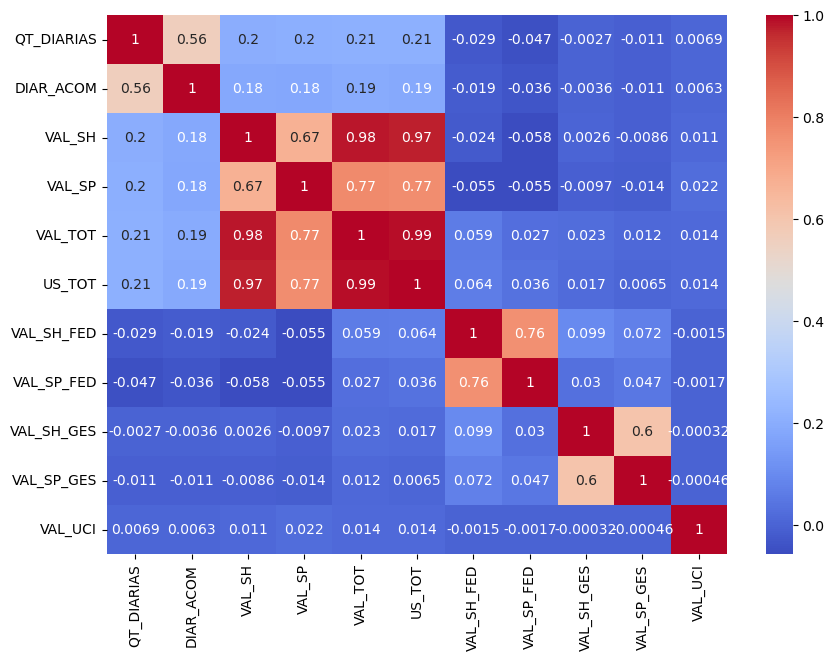

In [5]:
correlacao = dadosMedicos.copy()
correlacao = correlacao[['QT_DIARIAS', 'DIAR_ACOM', 'VAL_SH', 'VAL_SP', 'VAL_TOT', 'US_TOT', 'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI']]
correlacao[['VAL_SH', 'VAL_SP', 'VAL_TOT', 'US_TOT', 'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI']] = correlacao[['VAL_SH', 'VAL_SP', 'VAL_TOT', 'US_TOT', 'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI']].apply(lambda x: x.str.replace(',','.'))
correlacao[['VAL_SH', 'VAL_SP', 'VAL_TOT', 'US_TOT', 'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI']] = correlacao[['VAL_SH', 'VAL_SP', 'VAL_TOT', 'US_TOT', 'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI']].astype(float)
correlation_matrix = correlacao.corr()

plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig('imagens/correlation_matrix_removal')
plt.show()


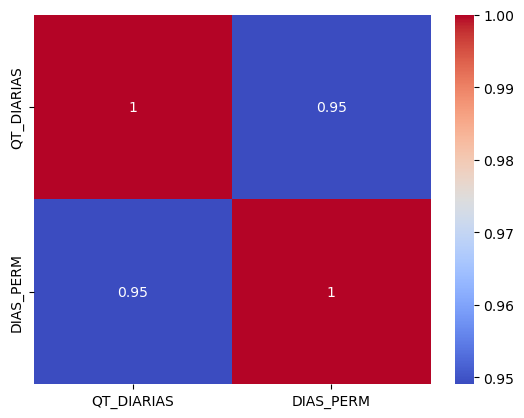

In [30]:
correlacao = dadosMedicos.copy()
correlacao = correlacao[['QT_DIARIAS', 'DIAS_PERM']]
correlation_matrix = correlacao.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig('imagens/correlation_matrix_dias')
plt.show()

In [6]:
data.to_csv(rf'..\2015_python.csv')

# Aplicação de métodos de Machine Learning

In [7]:
import graphviz
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, export_graphviz

import shap

In [31]:
temp = data.copy()
y = temp['QT_DIARIAS'].copy()

temp = temp.drop(columns=['QT_DIARIAS'])
temp = temp.drop(columns=obj_cols)
X = temp.copy()

# fit model
single_split_model = DecisionTreeRegressor(max_depth=4)
single_split_model.fit(X, y)

DecisionTreeRegressor(max_depth=4)

In [40]:
explainer = shap.Explainer(single_split_model, X)
shap_values = explainer(X, check_additivity=False)

 97%|=================== | 1019417/1048068 [00:15<00:00]       

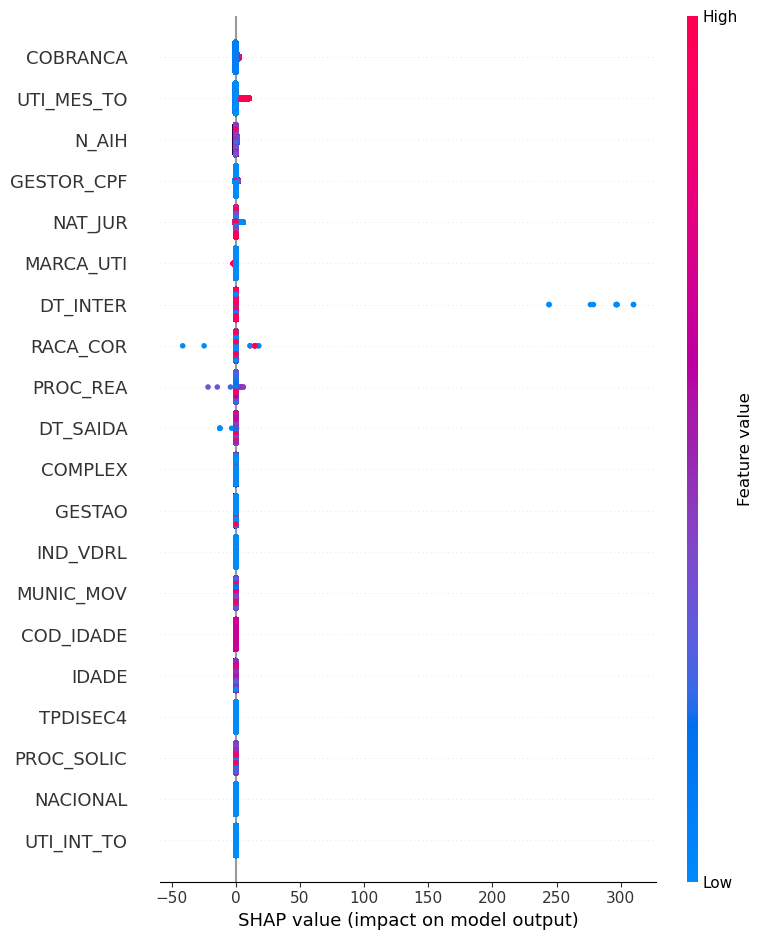

In [41]:
shap.summary_plot(shap_values, X)

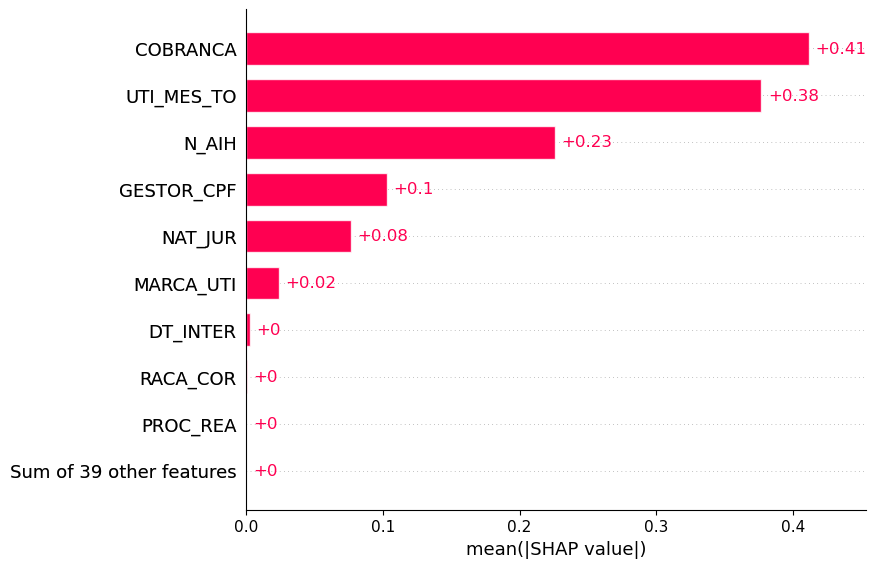

In [42]:
shap.plots.bar(shap_values)

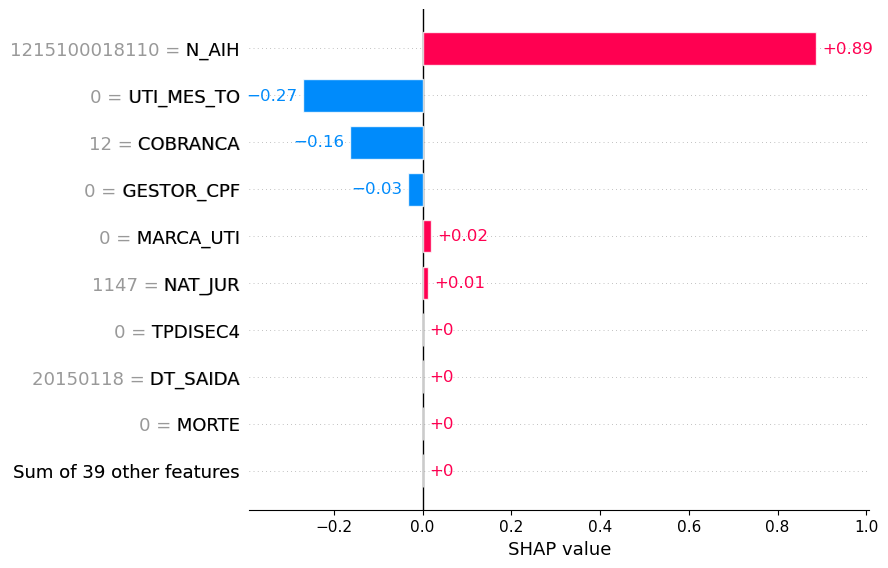

In [44]:
shap.plots.bar(shap_values[0])